# ML Assignment 2 : Group: 119

## Problem Statement:

Data were collected on 81 patients undergoing corrective spinal surgery (Bell et al., 1989). The objective was to determine important risk factors for kyphosis following surgery. The risk factors are age in years, the starting vertebrae level of the surgery, and the number of levels involved.



For the dataset, implement the Random Forest classifier using Python. [6M]

The marks distribution is as follows
<ul>
<li>Import the libraries and Load the dataset and Remove/replace missing values (if any) [1M]
<li>Split features and labels [0.5M]
<li>Split train and test data [0.5M}
<li>Implement Random Forest Classifier [2M]
<li>Calculate accuracy measures [2M]
</ul>


For the same dataset, implement classification with KNN using Python. [6M]

The marks distribution is as follows
<ul>
<li>Import the libraries and Load the dataset and Remove/replace missing values (if any) [1M]
<li>Split features and labels [0.5M]
<li>Split train and test data [0.5M}
<li>Implement KNN Classifier [2M]
<li>Calculate accuracy measures [2M]
</ul> 

Compare the results and accuracies for both the algorithms and share your inferences. [1M]


### Contributors
J Manoj Balaji (2019AB04228@wilp.bits-pilani.ac.in) <br>
Siddharth Verma (2019AD04097@wilp.bits-pilani.ac.in) <br>
Randeep Singh (2019AD04069@wilp.bits-pilani.ac.in) <br>



### 1. Import the libraries and Load the dataset and Remove/replace missing values (if any)

In [1]:
# Import code for data preparation
import numpy as np
import pandas as pd
from collections import Counter

# Import code  for modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

# Import code for plotting
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read dataset from csv file using read_csv function of pandas

In [2]:
df = pd.read_csv("kyphosis.csv")

#### Print first 5 rows of dataset to check whether read is successful or not

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


### Descriptive Statistics

#### With below functions:info() and describe() we are checking the range of different features and checking presence of nulls in it.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


#### No nulls in the dataset as seen above

In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


#### Finding: Age Distribution is from 1 to 206, we are assuming it is in months.

In [6]:
df.corr()

,Age,Number,Start
Age,1.000000,-0.016687,0.057828
Number,-0.016687,1.000000,-0.425099
Start,0.057828,-0.425099,1.000000


#### From below Kyphosis:Present cases are 20% of the entire data

C:\Users\sidus\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Counter({'absent': 64, 'present': 17})


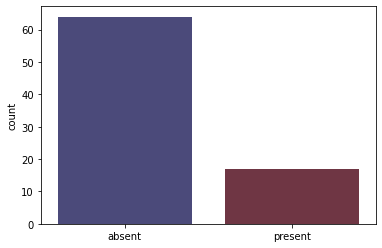

In [7]:
sns.countplot(df['Kyphosis'].values, palette='icefire')
print(Counter(df['Kyphosis']))

#### As seen below Number and Start features are slightly negatively correlated. However it is not significant enough to remove one of these two features.

<AxesSubplot:>

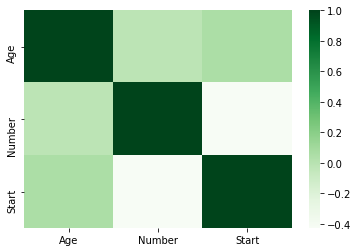

In [8]:
sns.heatmap((df.corr()), cmap="Greens")

#### As seen below Age distribution is heavy tailed 

C:\Users\sidus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

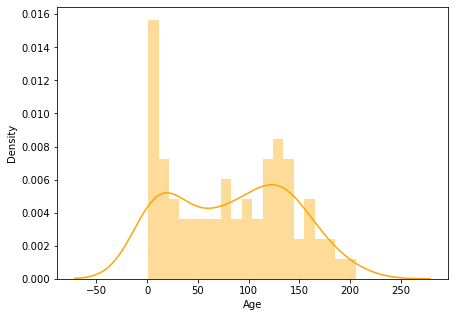

In [9]:
plt.figure(figsize=(7,5))
sns.distplot(df['Age'], bins=20, color='orange')

#### As seen below, For starting value of starting vertebrae level of the surgery almost all cases have kyphosis absent

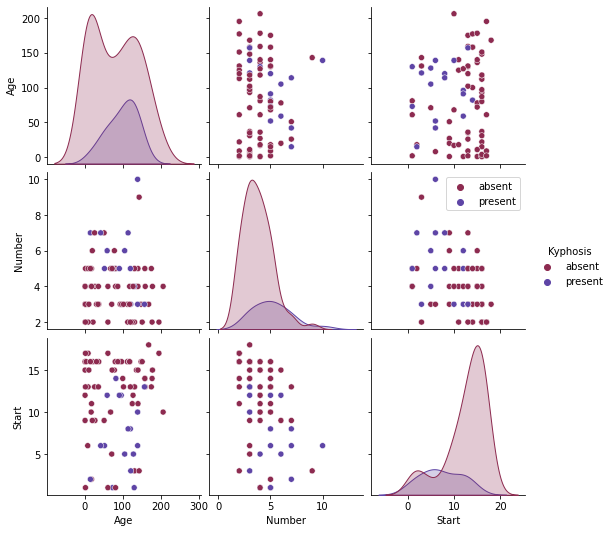

In [10]:
sns.pairplot(df,hue='Kyphosis', palette='twilight_r')
plt.legend()

 #### As seen below: By checking mean values for features per label category, There is a clear distinction between kyphosis cases for age (higher the age means more the chances of kyphosis) , the starting vertebrae level (lower the riskier), and the number of spine levels(higher the riskier)

In [11]:
df.groupby(['Kyphosis']).describe().T

Kyphosis          absent     present
Age    count   64.000000   17.000000
       mean    79.890625   97.823529
       std     61.861114   39.275048
       min      1.000000   15.000000
       25%     18.000000   73.000000
       50%     79.000000  105.000000
       75%    131.000000  128.000000
       max    206.000000  157.000000
Number count   64.000000   17.000000
       mean     3.750000    5.176471
       std      1.414214    1.878673
       min      2.000000    3.000000
       25%      3.000000    4.000000
       50%      4.000000    5.000000
       75%      5.000000    6.000000
       max      9.000000   10.000000
Start  count   64.000000   17.000000
       mean    12.609375    7.294118
       std      4.427967    4.283175
       min      1.000000    1.000000
       25%     11.000000    5.000000
       50%     14.000000    6.000000
       75%     16.000000   12.000000
       max     18.000000   14.000000

#### Start looks like negatively skewed and Number looks like positive skewed as below

In [12]:
df.skew().T

Age       0.054317
Number    1.131390
Start    -0.885926
dtype: float64

#### Label category wise skeweness below: Start looks negatively skewed for absent class and Number looks positively skewed for both the classes

In [13]:
df.groupby(['Kyphosis']).skew().T

Kyphosis,absent,present
Age,0.203509,-0.562174
Number,1.086186,0.929513
Start,-1.393117,0.057306


### 2. Split features and labels

In [14]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

### 3. Split train and test data 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

#### MinMax scaling is applied to normalize the data, so that different features present in dataset having different ranges are scaled to one range.

In [16]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [17]:
X_train[:5], X_test[:5]

(array([[0.32682927, 0.375     , 0.52941176],
        [0.        , 0.125     , 0.47058824],
        [0.69268293, 0.875     , 0.11764706],
        [0.76097561, 0.125     , 0.70588235],
        [0.67317073, 0.125     , 0.52941176]]),
 array([[0.90721649, 0.        , 0.8125    ],
        [0.58247423, 1.        , 0.4375    ],
        [0.41752577, 0.6       , 0.8125    ],
        [0.01546392, 0.2       , 0.9375    ],
        [0.18041237, 0.4       , 0.75      ]]))

In [18]:
X_train.shape, X_test.shape

((64, 3), (17, 3))

In [19]:
Counter(y_train), Counter(y_test)

(Counter({'absent': 51, 'present': 13}), Counter({'absent': 13, 'present': 4}))

## 4. Implement Random Forest

#### Check for random forest with different hyperparameters

In [20]:
num_of_trees = list(range(2,20,2))
rf_scores = []
for n in num_of_trees:
   rf = RandomForestClassifier(n_estimators=n, random_state=42)
   rf.fit(X_train, y_train)
   rf_score = cross_val_score(rf, X, y, cv=3, scoring='accuracy')
   rf_scores.append(rf_score.mean())

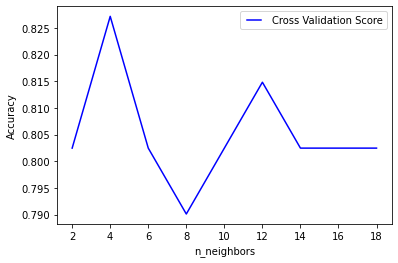

In [21]:
line1, = plt.plot(num_of_trees, rf_scores, 'b', label="Cross Validation Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.show()

#### Choose 4 as the optimal number of trees/estimators from the above cross validation scores

In [22]:
rfc = RandomForestClassifier(n_estimators=4, random_state=42)

In [23]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4, random_state=42)

In [24]:
rfc_test_pred = rfc.predict(X_test)
rfc_train_pred = rfc.predict(X_train)

### 5. Calculate accuracy measures

In [25]:
print("Test Accuracy: ",100*round(accuracy_score(y_test,rfc_test_pred),5), " %")

Test Accuracy:  94.118  %


In [26]:
print(confusion_matrix(y_test,rfc_test_pred))
print('\n')
print(classification_report(y_test,rfc_test_pred))

[[13  0]
 [ 1  3]]


              precision    recall  f1-score   support

      absent       0.93      1.00      0.96        13
     present       1.00      0.75      0.86         4

    accuracy                           0.94        17
   macro avg       0.96      0.88      0.91        17
weighted avg       0.95      0.94      0.94        17



# Implement classification with KNN using Python

### Steps 1. to 3. are completed above

## 4. Implement KNN Classifier

#### Test KNN with different neighbour values 

In [27]:
neighbors = list(range(2,15))
scores = []
for n in neighbors:
   knn = KNeighborsClassifier(n_neighbors=n)
   knn.fit(X_train, y_train)
   score = cross_val_score(knn, X, y, cv=3, scoring='accuracy')
   scores.append(score.mean())

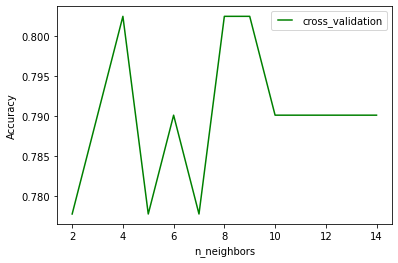

In [28]:
line1, = plt.plot(neighbors, scores, 'g', label="cross_validation")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.show()

#### Choose 4 as the optimal number of neighbours from the above cross validation scores

In [29]:
knn = KNeighborsClassifier(n_neighbors=4)
#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
knn_y_pred = knn.predict(X_test)

### 5. Calculate Accuracy measures 

In [30]:
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy: ",100*round(accuracy_score(y_test,knn_y_pred),5), " %")

Test Accuracy:  88.235  %


In [31]:
print(confusion_matrix(y_test,knn_y_pred))
print('\n')
print(classification_report(y_test,knn_y_pred))

[[13  0]
 [ 2  2]]


              precision    recall  f1-score   support

      absent       0.87      1.00      0.93        13
     present       1.00      0.50      0.67         4

    accuracy                           0.88        17
   macro avg       0.93      0.75      0.80        17
weighted avg       0.90      0.88      0.87        17



## Accuracy Comparison and Inference

### Accuracy Comparison
Accuracy for random forest classifier (94.12 %) is greater than K-nearest neighbours classifier (88.24 %). Hence for this dataset random forest classifier is performing better than the K-nearest neighbours classifier. 

### Inference

1. We would like to infer that since random forest technique leverages predictive power of multiple classifiers in one single model, and K-nearest neighbours algorithm is a single classifier in itself hence the random forest technique has better prediction accuracy on the test set in comparison to the K-nearest neighbours algorithm. 

2. Since random forest performs random sampling on the data and builds decision trees based out of it, the chances of it generalizing is very high. Theoretically KNN should work better on smaller data but it's not generalizing.
